<a href="https://colab.research.google.com/github/rahuldevkar5/Data_Science/blob/main/Neural_Networks_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import the libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
forest=pd.read_csv('/content/forestfires.csv')
forest

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small


In [3]:
forest.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [4]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [5]:
forest.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

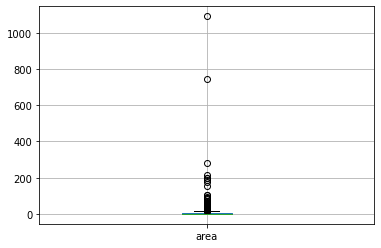

In [6]:
#Box plot
forest.boxplot(column=['area'])

In [7]:
forest.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [8]:
columns=['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category']
Forest=forest[columns]

In [9]:
Forest.drop(columns=['month','day','daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed','dayfri', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep'],inplace=True)

In [10]:
Forest

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [11]:
forest=pd.get_dummies(Forest)
forest

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category_large,size_category_small
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,1,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,1,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,1,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,1


In [12]:
#STANDARDIZE
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(forest.iloc[:,0:11])
scaler.transform(forest.iloc[:,0:11])

array([[-0.80595947, -1.32332557, -1.83047676, ..., -0.20201979,
        -0.60640322,  0.60640322],
       [-0.00810203, -1.17954077,  0.48889092, ..., -0.20201979,
        -0.60640322,  0.60640322],
       [-0.00810203, -1.04982188,  0.56071545, ..., -0.20201979,
        -0.60640322,  0.60640322],
       ...,
       [-1.64008316, -0.84664771,  0.47476811, ..., -0.02653216,
         1.64906775, -1.64906775],
       [ 0.68095666,  0.54900254,  0.26938221, ..., -0.20201979,
        -0.60640322,  0.60640322],
       [-2.02087875, -1.68591332, -1.78044169, ..., -0.20201979,
        -0.60640322,  0.60640322]])

In [13]:
forest.columns

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area',
       'size_category_large', 'size_category_small'],
      dtype='object')

In [14]:
columns=['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area',
       'size_category_large', 'size_category_small']
Forest=forest[columns]

In [15]:
input=['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'size_category_large', 'size_category_small']
output=['area']

X=Forest[input]
y=Forest[output]

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2)

In [17]:
#Using KERAS model
from keras.models import Sequential
from keras.layers import Dense

In [18]:
#create model
model = Sequential()
model.add(Dense(14, input_dim=10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='relu'))

In [19]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
# fit the keras model on the dataset
model.fit(X_train, y_train,epochs=150,validation_split=0.33)
pred_train = model.predict(X_train)

Epoch 1/150
9/9 [==============================] - 15s 70ms/step - loss: 100.1307 - accuracy: 0.3768 - val_loss: 147.2065 - val_accuracy: 0.3066
Epoch 2/150
9/9 [==============================] - 0s 5ms/step - loss: 28.6005 - accuracy: 0.3270 - val_loss: 133.0920 - val_accuracy: 0.2263
Epoch 3/150
9/9 [==============================] - 0s 7ms/step - loss: 25.1879 - accuracy: 0.2736 - val_loss: 117.1283 - val_accuracy: 0.1825
Epoch 4/150
9/9 [==============================] - 0s 4ms/step - loss: -7.8949 - accuracy: 0.2265 - val_loss: -168.5904 - val_accuracy: 0.1460
Epoch 5/150
9/9 [==============================] - 0s 7ms/step - loss: -142.2198 - accuracy: 0.1145 - val_loss: -170.0576 - val_accuracy: 0.1241
Epoch 6/150
9/9 [==============================] - 0s 6ms/step - loss: -72.7554 - accuracy: 0.1245 - val_loss: -169.9552 - val_accuracy: 0.1241
Epoch 7/150
9/9 [==============================] - 0s 4ms/step - loss: -85.7860 - accuracy: 0.1292 - val_loss: -169.9552 - val_accuracy: 0.

In [21]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred

array([[ 0.        ],
       [ 8.620783  ],
       [ 9.219955  ],
       [ 9.109213  ],
       [ 8.689451  ],
       [ 0.37677205],
       [ 9.265183  ],
       [ 9.629576  ],
       [ 7.1089454 ],
       [ 0.        ],
       [19.490398  ],
       [ 2.5674791 ],
       [10.910715  ],
       [ 0.        ],
       [ 3.8648376 ],
       [ 0.        ],
       [ 8.437565  ],
       [ 6.6386356 ],
       [ 0.        ],
       [ 7.985532  ],
       [16.267645  ],
       [ 9.8251705 ],
       [ 4.50226   ],
       [ 6.793318  ],
       [ 6.4733872 ],
       [ 8.487654  ],
       [ 0.        ],
       [ 0.        ],
       [ 9.423273  ],
       [11.150114  ],
       [12.70867   ],
       [ 2.702972  ],
       [11.279152  ],
       [ 9.565447  ],
       [ 4.193989  ],
       [ 2.3569946 ],
       [ 4.5406303 ],
       [ 4.7682    ],
       [ 9.350874  ],
       [ 4.1781387 ],
       [ 7.1699734 ],
       [23.849098  ],
       [ 3.039606  ],
       [ 7.947416  ],
       [21.074589  ],
       [ 4

In [22]:
# evaluate the keras model
accuracy = model.evaluate(X, y)
print("%s: %.2f%%" % (model.metrics_names[1], accuracy[1]*100))

17/17 [==============================] - 0s 1ms/step - loss: -134.5437 - accuracy: 0.1161
accuracy: 11.61%
